# Chapter 3: Estimating Expected Returns and Covariances

## 3.1 Estimating Expected Returns

## Listing 3.1

In [49]:
import pandas as pd
import yfinance as yf

df = yf.download("AAPL", start='2000-01-03', end='2025-03-31', auto_adjust=False)
df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2025-03-24,220.729996,220.729996,221.479996,218.580002,221.000000,44299500
2025-03-25,223.750000,223.750000,224.100006,220.080002,220.770004,34493600
2025-03-26,221.529999,221.529999,225.020004,220.470001,223.509995,34466100
2025-03-27,223.850006,223.850006,224.990005,220.559998,221.389999,37094800
2025-03-28,217.899994,217.899994,223.809998,217.679993,221.669998,39818600


In [50]:
stocks = ['AAPL', 'FE', 'WMT']
stock_prices = yf.download(stocks, start='2000-01-03', end='2025-03-31', auto_adjust=False)['Adj Close']
stock_prices.head()

[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,FE,WMT
Date,,,
2000-01-03,0.842151,7.134867,14.307394
2000-01-04,0.771149,7.134867,13.772034
2000-01-05,0.782433,7.397619,13.490974
2000-01-06,0.714723,7.417831,13.638195
2000-01-07,0.748578,7.458258,14.668761


In [51]:
stock_returns = stock_prices.pct_change()
stock_returns.head()

Ticker,AAPL,FE,WMT
Date,,,
2000-01-03,NaN,NaN,NaN
2000-01-04,-0.084310,0.000000,-0.037418
2000-01-05,0.014633,0.036826,-0.020408
2000-01-06,-0.086538,0.002732,0.010913
2000-01-07,0.047369,0.005450,0.075565


In [52]:
stock_returns.mean()*252

Ticker
AAPL    0.298480
FE      0.101438
WMT     0.098146
dtype: float64

## Listing 3.2

In [53]:
import pandas_datareader as pdr

rf = pdr.DataReader('TB3MS', 'fred', start='2000-01-01', end='2025-03-31')
rf.sort_index(ascending=True, inplace=True)
rf.tail()

,TB3MS
DATE,
2024-11-01,4.42
2024-12-01,4.27
2025-01-01,4.21
2025-02-01,4.22
2025-03-01,4.20


In [54]:
mkt_prices = yf.download('SPY', start='2000-01-03', end='2025-03-31', auto_adjust=False)['Adj Close']
mkt_prices.tail()

[*********************100%***********************]  1 of 1 completed


Ticker,SPY
Date,
2025-03-24,574.080017
2025-03-25,575.460022
2025-03-26,568.590027
2025-03-27,567.080017
2025-03-28,555.659973


## Listing 3.3

In [55]:
import statsmodels.api as sm

stock_prices_monthly = stock_prices.resample('MS').first()
mkt_prices_monthly = mkt_prices.resample('MS').first()
aapl_returns_monthly = stock_prices_monthly['AAPL'].pct_change()
mkt_returns_monthly = mkt_prices_monthly['SPY'].pct_change()

y = (aapl_returns_monthly - rf['TB3MS']/100/12).dropna()
X = (mkt_returns_monthly - rf['TB3MS']/100/12).dropna()

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.301
Model:                            OLS   Adj. R-squared (uncentered):              0.299
Method:                 Least Squares   F-statistic:                              129.7
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                    3.19e-25
Time:                        19:11:47   Log-Likelihood:                          280.35
No. Observations:                 302   AIC:                                     -558.7
Df Residuals:                     301   BIC:                                     -555.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [56]:
print('The beta for AAPL is: ', results.params)

The beta for AAPL is:  x1    1.300645
dtype: float64


The beta for FE:

In [57]:
fe_returns_monthly = stock_prices_monthly['FE'].pct_change()
y = (fe_returns_monthly - rf['TB3MS']/100/12).dropna()
model = sm.OLS(y,X)
results = model.fit()
print('The beta for FE is: ', results.params)

The beta for FE is:  x1    0.293586
dtype: float64


The beta for WMT:

In [58]:
wmt_returns_monthly = stock_prices_monthly['WMT'].pct_change()
y = (wmt_returns_monthly - rf['TB3MS']/100/12).dropna()
model = sm.OLS(y,X)
results = model.fit()
print('The beta for WMT is: ', results.params)

The beta for WMT is:  x1    0.502801
dtype: float64


In [59]:
print('The current risk-free rate is', rf['TB3MS'].iloc[-1],'%')

The current risk-free rate is 4.2 %


In [60]:
print('The avg annualized market return is', mkt_returns_monthly.mean()*12*100, '%')

The avg annualized market return is 8.728944781647256 %


## Listing 3.4

raw bond average returns  0.09673030238651528
excess bond average returns  0.06364354439564769


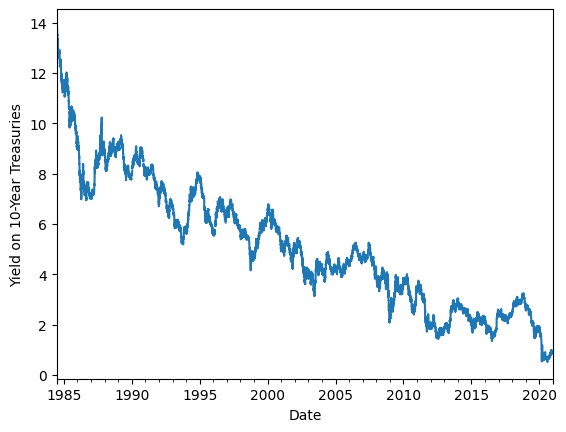

In [61]:
start = '1984-06-29'
end = '2020-12-31'
symbol = 'BAMLCC8A015PYTRIV'

bond = pdr.DataReader(symbol, 'fred', start=start, end=end) #A
bond_monthly = bond.resample('ME').last()
bond_returns_monthly = bond_monthly.pct_change()

TenYr = pdr.DataReader('DGS10', 'fred', start='1984-06-29', end='2020-12-31') #B
TenYr_monthly = TenYr.resample('ME').last()
TenYr_change_monthly = TenYr_monthly.diff().dropna()/100.
TenYr_change_monthly.rename(columns={'DGS10': 'Change 10Yr Yield'}, inplace=True)

rf = pdr.DataReader('DTB3', 'fred', start='1984-06-29', end='2020-12-31') #C
rf_monthly = rf.resample('ME').last()/100

TenYr.plot(xlabel='Date', ylabel='Yield on 10-Year Treasuries', legend=False) #D

print('raw bond average returns ', bond_returns_monthly[symbol].mean()*12)
print('excess bond average returns ', (bond_returns_monthly[symbol] -
                                       rf_monthly['DTB3'].shift()/12).mean()*12)

#A Download corporate bond data
#B Download Treasury yield data
#C Download short-term risk-free rate data
#D The plot of Treasury yields displayed in Figure 3.2

## Listing 3.5

In [62]:
y = (bond_returns_monthly[symbol] - rf_monthly['DTB3'].shift()/12).dropna()
X = TenYr_change_monthly
X = sm.add_constant(X)
common_dates = X.index.intersection(y.index)
X = X.loc[common_dates]
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     364.4
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           1.72e-59
Time:                        19:11:53   Log-Likelihood:                 1123.3
No. Observations:                 438   AIC:                            -2243.
Df Residuals:                     436   BIC:                            -2234.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0036      0.00

In [63]:
print('The expected return after stripping out valuation is ', results.params.iloc[0]*12)

The expected return after stripping out valuation is  0.04261614539214148


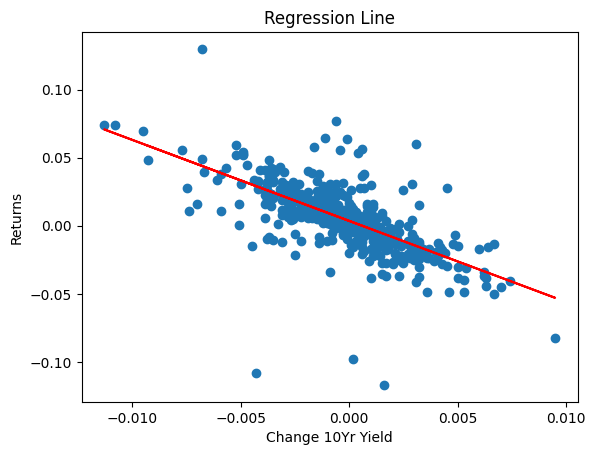

In [64]:
# Plot the regression line
import matplotlib.pyplot as plt

plt.plot(X['Change 10Yr Yield'], results.fittedvalues, color='red')
plt.scatter(X['Change 10Yr Yield'], y)
plt.xlabel('Change 10Yr Yield')
plt.ylabel('Returns')
plt.title('Regression Line')
plt.show()

## Listing 3.6

In [65]:
start = '1983-01-01'
end = '2023-01-01'

stock = yf.download('VFINX', start=start, end=end, auto_adjust=False)
stock_annual = stock.resample('AS').first()
stock_returns_annual = stock_annual['Adj Close'].pct_change()

stock_returns_annual
print('raw stock average returns ', stock_returns_annual.mean())
stock_returns_annual

[*********************100%***********************]  1 of 1 completed

raw stock average returns  Ticker
VFINX    0.125968
dtype: float64



/var/folders/6g/0ggzchw54n9_f4jpxx_2www80000gp/T/ipykernel_521/1415399158.py:5: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  stock_annual = stock.resample('AS').first()


Ticker,VFINX
Date,
1983-01-01,NaN
1984-01-01,0.184922
1985-01-01,0.030302
1986-01-01,0.229114
1987-01-01,0.122059
1988-01-01,0.065010
1989-01-01,0.110661
1990-01-01,0.351852
1991-01-01,-0.061071


In [66]:
#A Read Excel file with CAPE data
#B The year is the integer part of the date
#C The month is the decimal part of the date
CAPE = pd.read_excel('ie_data.xls', sheet_name='Data',
            usecols=['Date', 'CAPE'], skiprows=7)  # A
CAPE = CAPE.dropna()

CAPE['Year'] = CAPE['Date'].astype(int)  # B
CAPE['Month'] = round(100 * (CAPE['Date'] - CAPE['Year'])).astype(int)  # C
CAPE['Year'] = CAPE['Year'].astype(str)
CAPE['Month'] = CAPE['Month'].astype(str)
CAPE['Date'] = CAPE['Year'] + '-' + CAPE['Month'] + '-' + '01'
CAPE = CAPE.set_index('Date')

CAPE.index = pd.to_datetime(CAPE.index, format='%Y-%m-%d')
CAPE.drop(columns=['Year', 'Month'], inplace=True)
CAPE = CAPE.resample('AS').first()
CAPE['CAPE_returns'] = CAPE['CAPE'].pct_change()
CAPE

/var/folders/6g/0ggzchw54n9_f4jpxx_2www80000gp/T/ipykernel_521/2952993649.py:17: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  CAPE = CAPE.resample('AS').first()


,CAPE,CAPE_returns
Date,,
1881-01-01,18.473952,NaN
1882-01-01,15.678764,-0.151304
1883-01-01,15.270259,-0.026055
1884-01-01,14.432822,-0.054841
1885-01-01,13.129817,-0.090281
...,...,...
2019-01-01,28.380164,-0.147931
2020-01-01,30.985220,0.091791
2021-01-01,34.512432,0.113835


In [67]:
rf = pdr.DataReader('DTB3', 'fred', start=start, end=end)
rf_annual = rf.resample('AS').first()/100

print(rf.head())
print(rf_annual['DTB3'])

print('raw stock average returns ',stock_returns_annual['VFINX'].mean())
print('excess stock average returns ', (stock_returns_annual['VFINX'] - rf_annual['DTB3'].shift()).mean())


            DTB3
DATE            
1983-01-03  7.92
1983-01-04  8.00
1983-01-05  7.98
1983-01-06  7.94
1983-01-07  7.76
DATE
1983-01-01    0.0792
1984-01-01    0.0900
1985-01-01    0.0783
1986-01-01    0.0710
1987-01-01    0.0555
1988-01-01    0.0588
1989-01-01    0.0814
1990-01-01    0.0758
1991-01-01    0.0646
1992-01-01    0.0386
1993-01-01    0.0308
1994-01-01    0.0303
1995-01-01    0.0553
1996-01-01    0.0497
1997-01-01    0.0505
1998-01-01    0.0518
1999-01-01    0.0438
2000-01-01    0.0527
2001-01-01    0.0569
2002-01-01    0.0171
2003-01-01    0.0120
2004-01-01    0.0091
2005-01-01    0.0229
2006-01-01    0.0407
2007-01-01    0.0494
2008-01-01    0.0318
2009-01-01    0.0008
2010-01-01    0.0008
2011-01-01    0.0015
2012-01-01    0.0002
2013-01-01    0.0008
2014-01-01    0.0007
2015-01-01    0.0002
2016-01-01    0.0022
2017-01-01    0.0053
2018-01-01    0.0142
2019-01-01    0.0237
2020-01-01    0.0151
2021-01-01    0.0009
2022-01-01    0.0009
Freq: YS-JAN, Name: DTB3, dtype: flo

/var/folders/6g/0ggzchw54n9_f4jpxx_2www80000gp/T/ipykernel_521/252029775.py:2: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  rf_annual = rf.resample('AS').first()/100


## Listing 3.7

In [68]:
y = (stock_returns_annual['VFINX'] - rf_annual['DTB3'].shift()).dropna()
X = CAPE['CAPE_returns']
X = sm.add_constant(X)
common_dates = X.index.intersection(y.index)
X = X.loc[common_dates]

print(y)
print(X)

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

Date
1984-01-01    0.105722
1985-01-01   -0.059698
1986-01-01    0.150814
1987-01-01    0.051059
1988-01-01    0.009510
1989-01-01    0.051861
1990-01-01    0.270452
1991-01-01   -0.136871
1992-01-01    0.252817
1993-01-01    0.034820
1994-01-01    0.066391
1995-01-01   -0.016751
1996-01-01    0.330252
1997-01-01    0.163633
1998-01-01    0.294044
1999-01-01    0.227474
2000-01-01    0.156161
2001-01-01   -0.160226
2002-01-01   -0.146549
2003-01-01   -0.217473
2004-01-01    0.227695
2005-01-01    0.092588
2006-01-01    0.050903
2007-01-01    0.095703
2008-01-01   -0.009401
2009-01-01   -0.372454
2010-01-01    0.244851
2011-01-01    0.142913
2012-01-01    0.022244
2013-01-01    0.169656
2014-01-01    0.276662
2015-01-01    0.144206
2016-01-01   -0.002924
2017-01-01    0.142861
2018-01-01    0.211101
2019-01-01   -0.066375
2020-01-01    0.299095
2021-01-01    0.139713
2022-01-01    0.311855
Freq: YS-JAN, dtype: float64
            const  CAPE_returns
Date                           
1984-

## 3.2 Estimating Variances and Covariances

In [69]:
stock_returns.std() * (252**0.5)

Ticker
AAPL    0.386583
FE      0.255904
WMT     0.233952
dtype: float64

In [70]:
stock_returns.corr()

Ticker,AAPL,FE,WMT
Ticker,,,
AAPL,1.000000,0.204303,0.257411
FE,0.204303,1.000000,0.259350
WMT,0.257411,0.259350,1.000000


In [71]:
stock_returns.cov() * 252

Ticker,AAPL,FE,WMT
Ticker,,,
AAPL,0.149446,0.020211,0.023281
FE,0.020211,0.065487,0.015527
WMT,0.023281,0.015527,0.054733


In [72]:
import pandas as pd
import numpy as np

# Download S&P500 prices around the 1987 stock market crash
SP500 = yf.download('^GSPC', start='1987-10-07', end='1987-10-31', progress=False)
SP500
# Convert Series to a DataFrame and add a column for Percent Change
# SP500 = pd.DataFrame(SP500)
SP500['% Change'] = SP500['Close'].pct_change()*100
SP500 = SP500.dropna()
SP500

Price,Close,High,Low,Open,Volume,% Change
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
1987-10-08,314.160004,319.339996,312.019989,318.540009,198700000,-1.375025
1987-10-09,311.070007,315.040009,310.970001,314.160004,158300000,-0.983574
1987-10-12,309.390015,311.070007,306.760010,311.070007,141900000,-0.540069
1987-10-13,314.519989,314.529999,309.390015,309.390015,172900000,1.658093
1987-10-14,305.230011,314.519989,304.779999,314.519989,207400000,-2.953700
1987-10-15,298.079987,305.230011,298.070007,305.209991,263200000,-2.342504
1987-10-16,282.700012,298.920013,281.519989,298.079987,338500000,-5.159680
1987-10-19,224.839996,282.700012,224.830002,282.700012,604300000,-20.466931


## Listing 3.8

In [73]:
SP500 = yf.download('^GSPC', start='1987-01-01', end='2022-05-10')
SP500['Ret'] = SP500['Close'].pct_change()
SP500['Sq Ret'] = SP500['Ret']**2
AutoCorr = SP500['Sq Ret'].autocorr()
se = 1/(len(SP500)**0.5)
t_stat = AutoCorr/se

print('The autocorrelation of squared returns is', AutoCorr)
print('The standard error is', se)
print('The t-stat is', t_stat)

[*********************100%***********************]  1 of 1 completed

The autocorrelation of squared returns is 0.22277573731844078
The standard error is 0.010594028769395471
The t-stat is 21.02842480114891


[*********************100%***********************]  1 of 1 completed


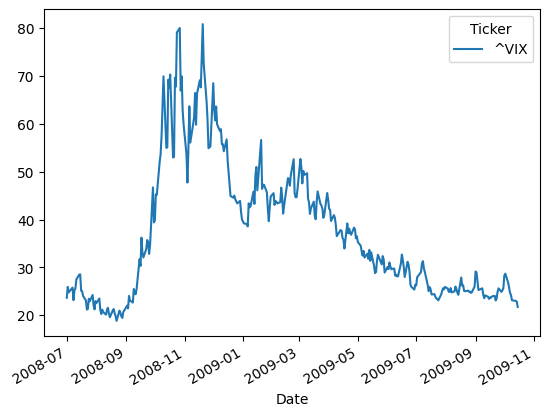

In [74]:
VIX = yf.download('^VIX', start='2008-07-01', end='2009-10-16')['Close']
VIX.plot();

## Listing 3.9

In [75]:
from arch import arch_model

AAPL_prices = yf.download('AAPL', start='2000-01-03', end='2022-05-24', auto_adjust=False)['Adj Close']
returns = 100 * AAPL_prices.pct_change().dropna()

horizon = 63
am = arch_model(returns)
res = am.fit()
forecasts = res.forecast(horizon=horizon)
print(forecasts.residual_variance.iloc[-1,:])

[*********************100%***********************]  1 of 1 completed

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1872519.0067362934
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2997441.2179114698
Iteration:      3,   Func. Count:     22,   Neg. LLF: 12379.129850357678
Iteration:      4,   Func. Count:     28,   Neg. LLF: 12359.907838289237
Iteration:      5,   Func. Count:     34,   Neg. LLF: 12486.388075669303
Iteration:      6,   Func. Count:     40,   Neg. LLF: 12285.697783217467
Iteration:      7,   Func. Count:     46,   Neg. LLF: 12297.380144947569
Iteration:      8,   Func. Count:     52,   Neg. LLF: 12785.64133022922
Iteration:      9,   Func. Count:     59,   Neg. LLF: 12279.134263254651
Iteration:     10,   Func. Count:     65,   Neg. LLF: 12278.746646808551
Iteration:     11,   Func. Count:     70,   Neg. LLF: 12278.745740526734
Iteration:     12,   Func. Count:     74,   Neg. LLF: 12278.745740526718
Optimization terminated successfully    (Exit mode 0)
            Current function value: 12278.745740526734
            Iter

In [76]:
vol_forecast = (forecasts.residual_variance.iloc[-1,:].sum()*252/horizon)**0.5 / 100
print('Volatility forecast is ', vol_forecast)

Volatility forecast is  0.48972896724023035


In [77]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.54,h.55,h.56,h.57,h.58,h.59,h.60,h.61,h.62,h.63
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-23,9.871844,9.85816,9.844602,9.831168,9.817859,9.804672,9.791607,9.778663,9.765837,9.75313,...,9.296026,9.287649,9.279349,9.271126,9.262979,9.254907,9.246909,9.238985,9.231134,9.223355


In [78]:
Corr = [[ 1. ,  0.8, -0.2],
        [ 0.8,  1. ,  0.5],
        [-0.2,  0.5,  1. ]]
eigenvalues = np.linalg.eigvals(Corr)
print(np.all(eigenvalues > 0))

False


In [79]:
eigenvalues > 0

array([False,  True,  True])

In [80]:
Corr = [[ 1. ,  0.8, -0.2],
        [ 0.8,  1. ,  0.4],
        [-0.2,  0.4,  1. ]]
eigenvalues = np.linalg.eigvals(Corr)
print(np.all(eigenvalues > 0))

True
